## Detecting malignant breast cancer tumours using Convolutional Neural Networks


### Importing packages
*Packages like numpy, matplotlib and random are imported as they will be required for further operations.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


*opencv package is also imported for operations on images.*

The func img_to_pixels takes in image path and outputs an array containing red-green-blue(rgb) pixel values

In [2]:
import cv2

def img_to_pixels(img_path):
    img = cv2.imread(img_path)
    height,width,_=img.shape
    img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    pixel_array = img_rgb.reshape((height,width,3))
    pixel_array=np.array(pixel_array)
    return pixel_array


The benign list as well as malignant list store the rgb pixel arrays of the benign images and malignant images respectively.

In [3]:
benign = []
malignant = []

The following cell extracts the benign images using path directory, sends it to the img_to_pixels function. The image is returned as a pixel array and appended to the benign list.

In [4]:
import os

folder_path_benign="Dataset2/FNA/benign/"
all_files_benign = os.listdir(folder_path_benign)


image_extensions = [".png"]
image_files_benign = [file for file in all_files_benign if any(file.lower().endswith(ext) for ext in image_extensions)]

for image_file in image_files_benign:
    
    image_path = os.path.join(folder_path_benign, image_file)
    px_arr = img_to_pixels(image_path)
    benign.append(px_arr)

benign = np.array(benign)




The following cell extracts the malignant images using path directory, sends it to the img_to_pixels function. The image is returned as a pixel array and appended to the malignant list.

In [5]:
folder_path_malignant="Dataset2/FNA/malignant/"
all_files_malignant = os.listdir(folder_path_malignant)


image_files_malignant = [file for file in all_files_malignant if any(file.lower().endswith(ext) for ext in image_extensions)]

for image_file in image_files_malignant:
    
    image_path = os.path.join(folder_path_malignant, image_file)
    px_arr = img_to_pixels(image_path)
    malignant.append(px_arr)

malignant = np.array(malignant)



In the following cell a benign image is shown at random

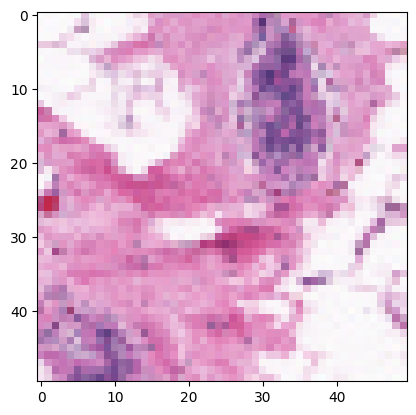

In [6]:
idx = random.randint(0,len(benign))
plt.imshow(benign[idx, : ])

In the following cell a malignant image is shown at random

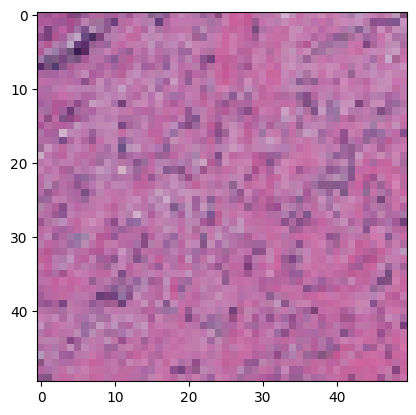

In [7]:
idx = random.randint(0,len(malignant))
plt.imshow(malignant[idx, : ])

The benign and malignant lists have been converted to numpy arrays for ease of calculation. Their sizes are reshaped and type formatted to float 32 to ensure that the arrays can be easily used for applying the CNN model of tensorflow.

In [8]:
benign = benign.reshape((1074,50,50,3)).astype('float32')
malignant = malignant.reshape((650,50,50,3)).astype('float32')

Benign label is an all zero array, representing benign images as 0. malignant label is an all one array, representing all malignant images as 1 for classification purposes. In the following cell, the benign and malignant lists have been concatenated to be used as a dataset of training examples X alongwith labels y.

In [9]:
benign_label = np.zeros(len(benign))
malignant_label=np.ones(len(malignant))

X = np.concatenate((benign,malignant),axis=0)
y = np.concatenate((benign_label,malignant_label),axis=0)

Train test split module of sklearn package is imported for separating the dataset X into training and test datasets with test-size = 20% of the total dataset.

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


Tensorflow package is imported. From tensorflow, CNN model is imported (Conv2D for images and Maxpooling) for creating the CNN model and making predictions on the images.

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.models import Sequential

The CNN model has 3 layers with 'relu' activation. The first two layers also have MaxPooling. After the Convolution layers, there are two dense layers with the output layer having 'sigmoid' activation. The model is compiled with adam optimizer, loss function binary crossentropy, and metric accuracy.

In [12]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape = (50,50,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation = 'relu'),
    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(1,activation ='sigmoid')

]
)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])


The model is fit on the training dataset and evaluated on the test dataset. The no. of epochs used is 10.

In [13]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2,batch_size=64)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
18/18 [==============================] - 9s 376ms/step - loss: 12.5893 - accuracy: 0.5648 - val_loss: 0.4443 - val_accuracy: 0.8587
Epoch 2/10
18/18 [==============================] - 5s 276ms/step - loss: 0.4340 - accuracy: 0.8250 - val_loss: 0.4359 - val_accuracy: 0.8804
Epoch 3/10
18/18 [==============================] - 5s 302ms/step - loss: 0.3474 - accuracy: 0.8830 - val_loss: 0.3725 - val_accuracy: 0.8768
Epoch 4/10
18/18 [==============================] - 5s 275ms/step - loss: 0.3208 - accuracy: 0.8840 - val_loss: 0.3620 - val_accuracy: 0.8877
Epoch 5/10
18/18 [==============================] - 6s 313ms/step - loss: 0.3150 - accuracy: 0.8930 - val_loss: 0.3626 - val_accuracy: 0.8913
Epoch 6/10
18/18 [==============================] - 5s 272ms/step - loss: 0.2970 - accuracy: 0.8948 - val_loss: 0.3508 - val_accuracy: 0.8986
Epoch 7/10
18/18 [==============================] - 5s 262ms/step - loss: 0.2867 - accuracy: 0.8939 - val_loss: 0.3904 - val_accuracy: 0.8913
Epoch

In [18]:
print(f'Test accuracy : {test_acc}, Test loss : {test_loss}')

Test accuracy : 0.8985507488250732, Test loss : 0.2977544367313385


The training loss has been plotted against validation loss to get an idea of how the loss function varies with number of epochs.

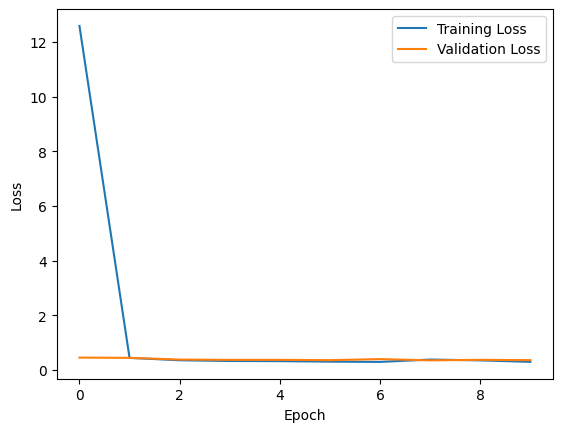

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The training accuracy has been plotted against validation accuracy to get an idea of how the accuracy function varies with number of epochs.

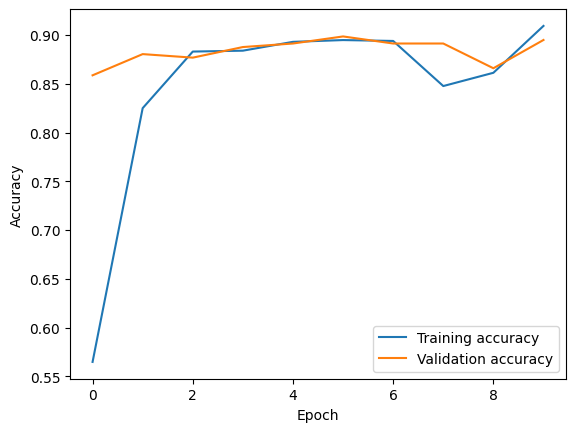

In [15]:
plt.plot(history.history['accuracy'],label = 'Training accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In the following cell, images from the test folder has been taken and converted into rgb pixel arrays using img_to_pixels function.

In [16]:
test_img=[]
folder_path_test="Dataset2/test/"
all_files_test = os.listdir(folder_path_test)


image_files_test = [file for file in all_files_test if any(file.lower().endswith(ext) for ext in image_extensions)]

for image_file in image_files_test:
    
    image_path = os.path.join(folder_path_test, image_file)
    px_arr = img_to_pixels(image_path)
    test_img.append(px_arr)

test_img = np.array(test_img)
test_img_reshaped = test_img.reshape((len(test_img),50,50,3)).astype('float32')

In the following cell, the CNN model created is used to predict whether the image is a benign tumor or a malignant tumor.

In [17]:
y_pred = model.predict(test_img_reshaped)
 
for i in range(len(test_img_reshaped)):
    if(y_pred[i]>=0.5):
        print(f"Image name : {image_files_test[i]},       Prediction : Malignant ")
    else:
        print(f"Image name : {image_files_test[i]},       Prediction : Benign")

1/1 [==============================] - 0s 255ms/step
Image name : eight.png,       Prediction : Malignant 
Image name : eleven.png,       Prediction : Malignant 
Image name : five.png,       Prediction : Malignant 
Image name : four.png,       Prediction : Malignant 
Image name : fourteen.png,       Prediction : Malignant 
Image name : nine.png,       Prediction : Malignant 
Image name : one.png,       Prediction : Benign
Image name : seven.png,       Prediction : Benign
Image name : six.png,       Prediction : Benign
Image name : ten.png,       Prediction : Malignant 
Image name : thirteen.png,       Prediction : Malignant 
Image name : three.png,       Prediction : Malignant 
Image name : twelve.png,       Prediction : Benign
Image name : two.png,       Prediction : Benign
